the accuracy of KMeans is =  0.8933333333333333
the accuracy score of gmm is=  0.3333333333333333
EM algorithm is better with using K-means


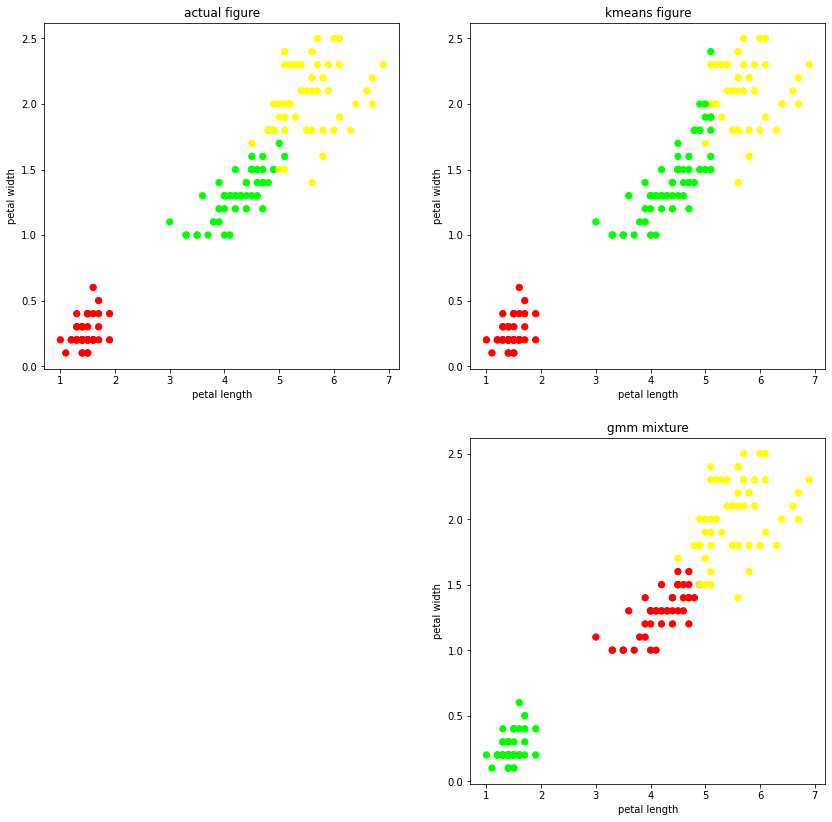

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import numpy as np
import pandas as pd


iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['sepal_length','sepal_width','petal_length','petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)
score1 = sm.accuracy_score(y, model.labels_)
print("the accuracy of KMeans is = ",score1 )

plt.figure(figsize=(14,14))
colormap=np.array(['red','lime','yellow'])

plt.subplot(2,2,1)
plt.scatter(X.petal_length, X.petal_width , c=colormap[y.Targets] ,s=40 )
plt.title("actual figure")
plt.xlabel("petal length")
plt.ylabel("petal width")

plt.subplot(2,2,2)
plt.scatter(X.petal_length, X.petal_width , c=colormap[model.labels_] ,s=40 )
plt.title("kmeans figure")
plt.xlabel("petal length")
plt.ylabel("petal width")

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns=X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
score2 = sm.accuracy_score(y, gmm_y)
print("the accuracy score of gmm is= ", score2 )

plt.subplot(2,2,4)
plt.scatter(X.petal_length, X.petal_width, c=colormap[gmm_y] , s=40)
plt.title("gmm mixture")
plt.xlabel("petal length")
plt.ylabel("petal width")

if(score1>score2):
    print("EM algorithm is better with using K-means")
else:
    print("Gausian Mixture is better with EM algorithm")
